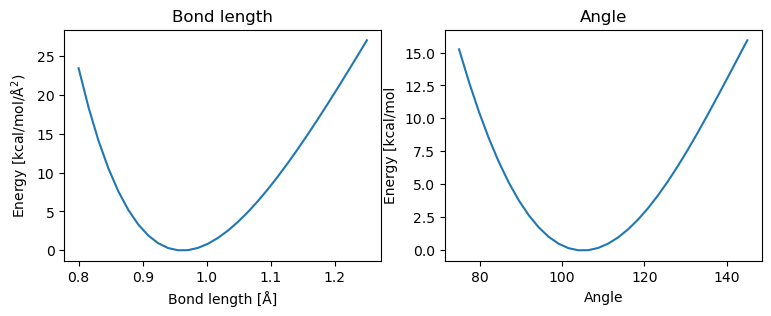

In [3]:
ref_bond_l = np.array([0.8, 0.81551724, 0.83103448, 0.84655172, 0.86206897, 0.87758621, 0.89310345, 0.90862069, 0.92413793, 0.93965517, 0.95517241, 0.97068966, 0.9862069 , 1.00172414, 1.01724138, 1.03275862, 1.04827586, 1.0637931, 1.07931034, 1.09482759, 1.11034483, 1.12586207, 1.14137931, 1.15689655, 1.17241379, 1.18793103, 1.20344828, 1.21896552, 1.23448276, 1.25      ])
ref_bond_e = np.array([-76.42109471002216, -76.42916426170174, -76.43599149933469, -76.44170130559088, -76.44640631226838, -76.45020824046648, -76.45319708421196, -76.45545177839954, -76.45704373518245, -76.45803844655762, -76.45849563687588, -76.45847024797392, -76.4580129527744, -76.45716953509049, -76.45598175481791, -76.45448692687691, -76.45271808971947, -76.4507047989308, -76.44847400921817, -76.4460499239478, -76.44345499179957, -76.440710471003, -76.43783566572576, -76.43484803994048, -76.4317635755497, -76.4285967457864, -76.42536032856904, -76.42206555091289, -76.41872248782467, -76.4153397871249])
ref_angle_a = np.array([ 75.0, 77.4137931 ,  79.82758621,  82.24137931,  84.65517241,  87.06896552,  89.48275862,  91.89655172,  94.31034483,  96.72413793,  99.13793103, 101.55172414, 103.96551724, 106.37931034, 108.79310345, 111.20689655, 113.62068966, 116.03448276, 118.44827586, 120.86206897, 123.27586207, 125.68965517, 128.10344828, 130.51724138, 132.93103448, 135.34482759, 137.75862069, 140.17241379, 142.5862069 , 145.        ])
ref_angle_e = np.array([-76.43422821765269, -76.43819713542415, -76.44178501890265, -76.44499875665923, -76.44784507154459, -76.4503315980731, -76.45246747638183, -76.45426278341616, -76.4557280486263, -76.4568741052718, -76.45771238396455, -76.45825476307509, -76.4585135702089, -76.4585011983501, -76.45822985999969, -76.45771164014876, -76.45695936996755, -76.45598692258213, -76.45480904479051, -76.45344088650619, -76.45189785110466, -76.4501961083386, -76.4483526823314, -76.4463851847924, -76.44431297778965, -76.44215721698187, -76.43993947269621, -76.43768124799685, -76.43540377181074, -76.43312863807513])

# Reference energy at minima and convert energy to kcal/mol
ref_bond_e = 627.5 * ( ref_bond_e - min(ref_bond_e))
ref_angle_e = 627.5 * ( ref_angle_e - min(ref_angle_e))

plt.figure(figsize=(9,3))
plt.subplot(121); plt.title('Bond length')
plt.plot(ref_bond_l, ref_bond_e)
plt.xlabel('Bond length [Å]')
plt.ylabel(r'Energy [kcal/mol/Å$^2$)')
plt.subplot(122); plt.title('Angle')
plt.xlabel('Angle')
plt.ylabel('Energy [kcal/mol')
plt.plot(ref_angle_a, ref_angle_e)
plt.show()

Scanning over bond lengths and angles are then achieved by introducing constraints in geometry optimizations, in order to get structures and energies along the scans. As an example, the potential energy surface of CO with a constraint is constructed as:

> *Note:* Running this notebook will produce a number of temporary `.hd5`, `.pdb`, `.xyz`, and `.txt` files. They contain information on optimization settings, iterations, and more, and can safely be discarded.

In [4]:
co_xyz = """
O       0.0       0.0       0.0
C       1.15      0.0       0.0
"""
mol_co = vlx.Molecule.read_str(co_xyz)
bas_co = vlx.MolecularBasis.read(mol_co, "STO-3G")

co_l = np.linspace(0.90, 1.50, 7)
co_e = []
co_xyzs = []
for l in co_l:
    bond_scan = "distance 1 2 {} {} 1".format(l, l)
    opt_drv.constraints = ["$scan", bond_scan]
    
    # Run the scan
    opt_molecule = opt_drv.compute(mol_co, bas_co)
    co_xyzs.append(opt_molecule.get_coordinates())
    co_e.append(scf_drv.get_scf_energy())

* Info * Reading basis set from file: /home/thomas/Notebook/anaconda/envs/echem/lib/python3.10/site-packages/veloxchem/basis/STO-3G
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                                  Basis: STO-3G                                                                           
                                                                                                                          
                                  Atom Contracted GTOs          Primitive GTOs                                            
                                                                                                                          
       

With resulting potential energy surface and structures visualized as:

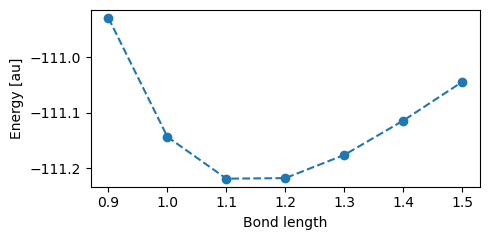

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
def vlx2py3d(elements, xyzs):
    # convert the VeloxChem outpyt to a format readable by py3Dmol
    p3d_xyzs = ""
    b2a = 0.5291772
    for i in np.arange(len(xyzs)):
        p3d_xyzs += "{}\n*\n".format(len(elements))
        j = 0
        for element in elements:
            p3d_xyzs += (
                element
                + " "
                + str(np.around(b2a * xyzs[i][j][0], 5))
                + " "
                + str(np.around(b2a * xyzs[i][j][1], 5))
                + " "
                + str(np.around(b2a * xyzs[i][j][2], 5))
                + "\n"
            )
            j += 1
    return p3d_xyzs

plt.figure(figsize=(5, 2.5))
plt.plot(co_l, co_e, "o--")
plt.xlabel("Bond length")
plt.ylabel("Energy [au]")
plt.tight_layout()
plt.show()

p3d_co = vlx2py3d(["O", "C"], co_xyzs)
viewer = p3d.view(width=500, height=200)
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.addModelsAsFrames(p3d_co)
viewer.animate({"loop": "backAndForth"})
viewer.setStyle({"stick": {}})
viewer.show()

Constraining an angle is instead done with `angle_scan = "angle 2 1 3 {} {} 1".format(angle, angle)`.

> We second angle input and `1` inside the string is due to [geomeTRIC](https://geometric.readthedocs.io/en/latest/constraints.html), which runs in the background, wanting to scan from one distance/angle to another, using a selected number of steps. In order to more easily extract SCF results for each constrained optimization, we want to run only one step per scan and thus specify the scans in this manner. 

### Exercises:
1. Calculate the water potential energy surfaces (bond length and angle) and compare to above reference calculations. In order to save time, perform this with HF using the STO-3G basis set and only considering a few (5-10) lengths/angles. 
2. Illustrate the scans using py3Dmol.
3. Construct a force field for each scan using a harmonic function, and compare the resulting potential energy surfaces to the original ones. Use the reference results for this fit and only include points with energy of less than 10 kcal/mol.
    - As 10 kcal/mol corresponds to several thousand degrees, the part of the potential energy surfaces above this will not be probed for most dynamics simulations.
    - You may have to provide a manual guess for the bond stretch fitting, in which case we suggest [1,1000], as is included by changing the function call to  `scipy.optimize.curve_fit(function, x, y, p0=[1,1000]`.

In [6]:
# Your scans here

##########
# Solution
# Bond length
bond_l = np.linspace(0.80, 1.25, 7)
bond_e = []
bond_xyzs = []
for l in bond_l:
    bond_scan = "distance 1 2 {} {} 1".format(l, l)
    opt_drv.constraints = ["$scan", bond_scan]
    opt_molecule = opt_drv.compute(molecule, basis)
    bond_xyzs.append(opt_molecule.get_coordinates())
    bond_e.append(scf_drv.get_scf_energy())
    
# Bond angle
angle_a = np.linspace(75, 145, 7)
angle_e = []
angle_xyzs = []
for angle in angle_a:
    angle_scan = "angle 2 1 3 {} {} 1".format(angle, angle)
    opt_drv.constraints = ["$scan", angle_scan]
    opt_molecule = opt_drv.compute(molecule, basis)
    angle_xyzs.append(opt_molecule.get_coordinates())
    angle_e.append(scf_drv.get_scf_energy())
    
# Reference energy at minima and convert energy to kcal/mol
bond_e = 627.5 * ( np.array(bond_e) - min(bond_e))
angle_e = 627.5 * ( np.array(angle_e) - min(angle_e))

                                                                                                                          
                                                Optimization Driver Setup                                                 
                                                                                                                          
                                     Coordinate System       :    TRIC                                                    
                                     Constraints             :    Yes                                                     
                                     Max. Number of Steps    :    300                                                     
                                     Transition State        :    No                                                      
                                     Hessian                 :    never                                                   
                

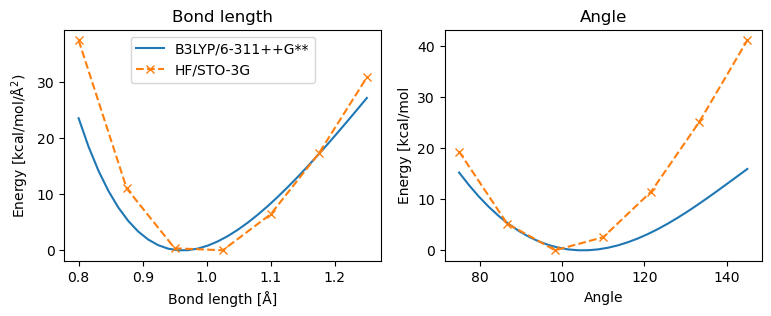

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
# Your illustrations here

##########
# Solution
plt.figure(figsize=(9,3))
plt.subplot(121); plt.title('Bond length')
plt.plot(ref_bond_l, ref_bond_e)
plt.plot(bond_l, bond_e,'--x')
plt.xlabel('Bond length [Å]')
plt.ylabel(r'Energy [kcal/mol/Å$^2$)')
plt.legend(('B3LYP/6-311++G**','HF/STO-3G'))
plt.subplot(122); plt.title('Angle')
plt.xlabel('Angle')
plt.ylabel('Energy [kcal/mol')
plt.plot(ref_angle_a, ref_angle_e)
plt.plot(angle_a, angle_e,'--x')
plt.show()

p3d_bond = vlx2py3d(["O", "H", "H"], bond_xyzs)
p3d_angle = vlx2py3d(["O", "H", "H"], angle_xyzs)
viewer = p3d.view(viewergrid=(1,2),width=800,height=200)
viewer.addModelsAsFrames(p3d_bond, viewer=(0,0))
viewer.animate({"loop": "BackAndForth"}, viewer=(0,0))
viewer.addModelsAsFrames(p3d_angle, viewer=(0,1))
viewer.animate({"loop": "BackAndForth"}, viewer=(0,1))
viewer.setStyle({'stick': {}})
viewer.zoomTo()
viewer.show()

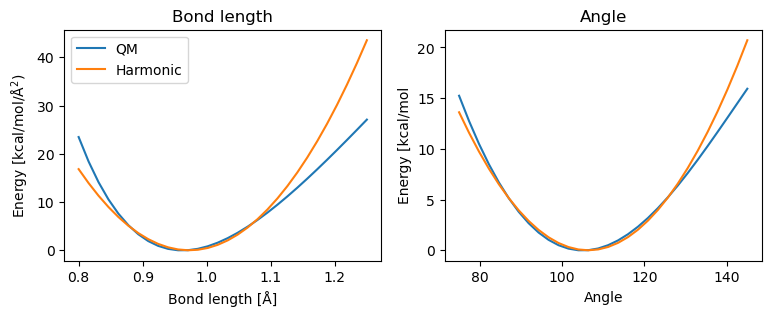

In [8]:
# Your fits here

##########
# Solution
def harm_func(a, a0, b):
    return (b / 2.0) * (a - a0) ** 2

indx, = np.where(ref_bond_e < 10.0)
bond_popt, bond_pvar = scipy.optimize.curve_fit(harm_func, ref_bond_l[min(indx):max(indx)],
                                                ref_bond_e[min(indx):max(indx)],p0=[1,1000])
indx, = np.where(ref_angle_e < 10.0)
angle_popt, angle_pvar = scipy.optimize.curve_fit(harm_func, ref_angle_a[min(indx):max(indx)],
                                                  ref_angle_e[min(indx):max(indx)])

plt.figure(figsize=(9,3))
plt.subplot(121); plt.title('Bond length')
plt.plot(ref_bond_l, ref_bond_e)
plt.plot(ref_bond_l, harm_func(ref_bond_l,*bond_popt))
plt.legend(('QM','Harmonic'))
plt.xlabel('Bond length [Å]')
plt.ylabel(r'Energy [kcal/mol/Å$^2$)')
plt.subplot(122); plt.title('Angle')
plt.xlabel('Angle')
plt.ylabel('Energy [kcal/mol')
plt.plot(ref_angle_a, ref_angle_e)
plt.plot(ref_angle_a, harm_func(ref_angle_a,*angle_popt))
plt.show()

An improvement over the harmonic potential for bond stretches is given by the [Morse potential](https://en.wikipedia.org/wiki/Morse_potential), which takes the form

$$
V_{\mathrm{Morse}}(r) = D_e \left( 1 - e^{-\alpha (r -r_0)^2} \right)
$$

Where $D_e$ is the depth of the potential well, $\alpha$ the width, and $r_0$ the location of the minima. This form provides an improved description, in particular over larger bond deviations in which anharmonicity becomes substantial.   

4. Fit a Morse to the bond stretch potential energy surface, and compare that to the QM results and harmonic fit.

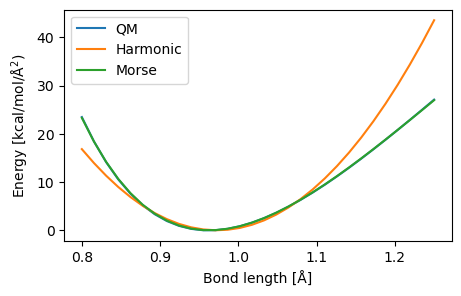

In [9]:
# Your fit here

##########
# Solution
def morse(r, D_e, alpha, r0):
    return D_e * ( 1 - np.e**( -alpha * ( r - r0 )))**2

morse_popt, morse_pvar = scipy.optimize.curve_fit(morse, ref_bond_l,ref_bond_e)

plt.figure(figsize=(5,3))
plt.plot(ref_bond_l, ref_bond_e)
plt.plot(ref_bond_l, harm_func(ref_bond_l,*bond_popt))
plt.plot(ref_bond_l, morse(ref_bond_l,*morse_popt))
plt.legend(('QM','Harmonic','Morse'))
plt.xlabel('Bond length [Å]')
plt.ylabel(r'Energy [kcal/mol/Å$^2$)')
plt.show()

# Non-bonded terms

The non-bonding terms include electrostatic interaction and van der Waals dispersion, resulting from charge distributions in the molecules and induced dipole-dipole interactions, respectively. As these interactions couple all atoms in the molecule, the evaluation of these terms can easily be the most costly part of an MD simulation, leading to a cut-off radius being applied for many cases. Note that atoms connected by chemical bonds are normally excluded from non-bonded terms, with the bonded terms accounting for these interactions.


## van der Waals interactions

The van der Waals interactions can be  modeled using a Lennard-Jones potential:

$$
{E_\mathrm{LJ}} = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right].
$$

The first ($r^{-12}$) term is due to exchange interaction, resulting in strong repulsion at short distances, and the second ($r^{-6}$) is due to induced dipole-dipole interactions, causing a weak attraction at longer distances. Of these, the second term has the correct physical scaling with distances, but the exchange interaction is only approximately correct, being too steep at short distances. More advanced force field forms are thus available, but Lennard-Jones is often used on account of its low computational cost, coupled with reasonable accuracy.



## Electrostatic interaction

Electrostatic interactions can be calculated using Coulomb's law:

$$
{E_\mathrm{electrostatic}} = \frac{q_i q_j}{4\pi \epsilon_0 r_{ij}},
$$

with $q_i$ and $q_j$ being point charges representing the (partial) charges of the interacting atoms. Again, more advanced interactions can be included for increasing accuracy. Many different approaches for estimating atomic charges are used, and we favour the restrained electrostatic potential ([RESP](https://kthpanor.github.io/echem/docs/env/resp.html)) charge model.


### RESP charges

The RESP model derive partial charges from the quantum mechanical electrostatic potential, including a penalty function which improves upon [earlier](https://kthpanor.github.io/echem/docs/env/esp.html) models. The method is available in VeloxChem, and partial charges are calculated as:

In [10]:
molecule = vlx.Molecule.read_str(water_xyz)
basis = vlx.MolecularBasis.read(molecule, "6-31G*")
resp_drv = vlx.RespChargesDriver()
resp_drv.update_settings({'equal_charges': '2 = 3'})
resp_charges = resp_drv.compute(molecule, basis, 'resp')

* Info * Reading basis set from file: /home/thomas/Notebook/anaconda/envs/echem/lib/python3.10/site-packages/veloxchem/basis/6-31G_D_
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                                  Basis: 6-31G*                                                                           
                                                                                                                          
                                  Atom Contracted GTOs          Primitive GTOs                                            
                                                                                                                          
     

Note that the method has been tailored to HF/6-31G*, and we do not recommend using any other methods or basis sets. With this selection, cancellations of errors leads to good partial charges, with results from the above calculation amounting to:

In [11]:
def print_charges(mol,resp_results):
    print("-"*20)
    print("Atom   Charge (a.u.)")
    print("-"*20)
    for label, charge in zip(mol.get_labels(), resp_results):
        print(f"{label :s} {charge : 18.6f}")
    print("-"*20)

print_charges(molecule,resp_charges)

--------------------
Atom   Charge (a.u.)
--------------------
O          -0.803521
H           0.401761
H           0.401761
--------------------


This can be compared to TIP3P partial charges:

| Element  | Charge    |
| -------- | ----------|
| O        | -0.834    |
| H        |  0.417    |

As can be seen, the RESP charges are close to that of the TIP3P model, even though the former was calculated for the gas phase. 

# Extra: dihedral angle bending

Scan and plot the potential energy for dihedral angle bending in methanol, using below initial geometry. Plot the potential energy surface and illustrate the scan.

In [12]:
methanol_xyz = """
C       0.6627602692    -0.0195253241    -0.0000000000
O      -0.7482324502     0.1217146925     0.0000000000
H       1.0282229693    -0.5397922417    -0.8872632580
H       1.0282229693    -0.5397922417     0.8872632580
H       1.0781531801     0.9835591659    -0.0000000000
H      -1.1253011321    -0.7605402778     0.0000000000
"""

In [13]:
# Your scan here

##########
# Solution
molecule = vlx.Molecule.read_str(methanol_xyz)
basis = vlx.MolecularBasis.read(molecule, "STO-3G")

# SCF calculation
scf_settings = {}
method_settings = {}
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.update_settings(scf_settings, method_settings)
scf_drv.compute(molecule, basis)

# Set up the gradient and optimization drivers:
grad_drv = vlx.ScfGradientDriver(scf_drv)
opt_drv = vlx.OptimizationDriver(grad_drv)

dihed_a = np.linspace(0, 120, 13)
dihed_e = []
dihed_xyzs = []
for dihedral in dihed_a:
    dihedral_scan = "dihedral 3 1 2 6 {} {} 1".format(dihedral, dihedral)
    opt_drv.constraints = ["$scan", dihedral_scan]
    opt_molecule = opt_drv.compute(molecule, basis)
    dihed_xyzs.append(opt_molecule.get_coordinates())
    dihed_e.append(scf_drv.get_scf_energy())

* Info * Reading basis set from file: /home/thomas/Notebook/anaconda/envs/echem/lib/python3.10/site-packages/veloxchem/basis/STO-3G
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                                  Basis: STO-3G                                                                           
                                                                                                                          
                                  Atom Contracted GTOs          Primitive GTOs                                            
                                                                                                                          
       

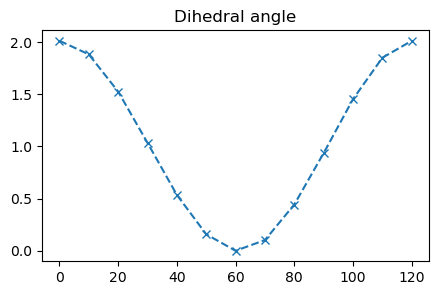

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [14]:
# Your illustrations here

##########
# Solution
dihed_e = 627.5 * ( np.array(dihed_e) - min(dihed_e))
plt.figure(figsize=(5,3))
plt.title('Dihedral angle')
plt.plot(dihed_a, dihed_e,'--x')
plt.show()

p3d_dihedra = vlx2py3d(["C", "O", "H", "H", "H", "H"], dihed_xyzs)
viewer = p3d.view(width=500,height=300)
viewer.addModelsAsFrames(p3d_dihedra)
viewer.animate({"loop": "BackAndForth"})
viewer.setStyle({'stick': {}})
viewer.zoomTo()
viewer.show()